In [74]:
import sklearn as sk
from sklearn import datasets
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [144]:
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC, ADASYN

In [76]:
#data = np.genfromtxt("data/adult.data", delimiter=",", dtype=np.str)

In [77]:
columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o']

In [78]:
data = pd.read_csv("data/adult.data", delimiter=",", names=columns)

In [79]:
# x = data[ : ,[0,1,3,4,5,6,7,8,9,10,11,12,13,14]]

In [80]:
data.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
a    32561 non-null int64
b    32561 non-null object
c    32561 non-null int64
d    32561 non-null object
e    32561 non-null int64
f    32561 non-null object
g    32561 non-null object
h    32561 non-null object
i    32561 non-null object
j    32561 non-null object
k    32561 non-null int64
l    32561 non-null int64
m    32561 non-null int64
n    32561 non-null object
o    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [82]:
data.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
k    0
l    0
m    0
n    0
o    0
dtype: int64

In [83]:
data.head(200)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23,Private,197387,5th-6th,3,Married-civ-spouse,Transport-moving,Other-relative,White,Male,0,0,40,Mexico,<=50K
196,36,Private,99374,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
197,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,14084,0,55,United-States,>50K
198,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K


In [84]:
encoder = OrdinalEncoder()

In [156]:
data.o = encoder.fit_transform(data.o.values.reshape(-1,1))
data.b = encoder.fit_transform(data.b.values.reshape(-1,1)) # work sector
data.d = encoder.fit_transform(data.d.values.reshape(-1,1)) # education level
data.f = encoder.fit_transform(data.f.values.reshape(-1,1)) # marital stauts
data.g = encoder.fit_transform(data.g.values.reshape(-1,1)) # work level
data.h = encoder.fit_transform(data.h.values.reshape(-1,1)) # family role
data.i = encoder.fit_transform(data.i.values.reshape(-1,1)) # race
data.j = encoder.fit_transform(data.j.values.reshape(-1,1)) # gender
data.k = encoder.fit_transform(data.k.values.reshape(-1,1)) # difficult to understand
data.n = encoder.fit_transform(data.n.values.reshape(-1,1)) # work sector



In [157]:
data.head(20)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,25.0,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0.0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0.0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0.0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0.0,0,40,5.0,0.0
5,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0.0,0,40,39.0,0.0
6,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0.0,0,16,23.0,0.0
7,52,6.0,209642,11.0,9,2.0,4.0,0.0,4.0,1.0,0.0,0,45,39.0,1.0
8,31,4.0,45781,12.0,14,4.0,10.0,1.0,4.0,0.0,105.0,0,50,39.0,1.0
9,42,4.0,159449,9.0,13,2.0,4.0,0.0,4.0,1.0,79.0,0,40,39.0,1.0


In [158]:
data['o'].value_counts()

0.0    24720
1.0     7841
Name: o, dtype: int64

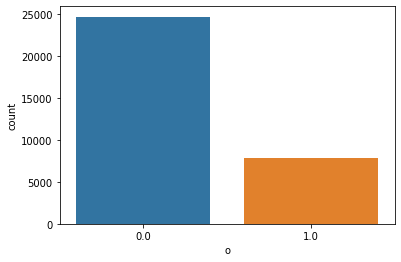

In [159]:
sns.countplot(data['o'])

In [160]:
X = data.drop('o', axis=1)
y = data['o']

In [161]:
# separate train

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 76)

In [163]:
# standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.fit_transform(X_test)


In [164]:
X_train[:5]

array([[ 0.32379587,  0.08709681,  0.33318253,  0.18218065, -0.41895638,
        -0.40697638,  1.28077882, -0.89819344,  0.39480767,  0.70090602,
        -0.27620946, -0.21776501, -0.03891865,  0.29309317],
       [-0.99716079,  0.08709681, -0.21588985, -2.66513603, -1.58516332,
         0.92237603,  0.09971568, -0.27525977,  0.39480767, -1.4267248 ,
        -0.27620946, -0.21776501, -0.03891865, -4.16727344],
       [-0.99716079,  0.08709681, -0.48040033, -0.33551329,  1.13598621,
         0.92237603,  1.28077882,  0.97060756, -3.12548566,  0.70090602,
         0.8015907 , -0.21776501, -0.03891865,  0.42053222],
       [-1.29070671,  0.08709681, -0.04105369,  0.18218065, -0.41895638,
         0.92237603,  1.28077882,  0.97060756,  0.39480767, -1.4267248 ,
        -0.27620946, -0.21776501, -0.36378743,  0.29309317],
       [ 2.23184438,  2.14456144, -0.28990256,  1.21756853, -0.03022073,
         2.25172845, -1.31756009, -0.27525977,  0.39480767, -1.4267248 ,
        -0.27620946,  1.78

**K Nearest Neighbors**

In [165]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print(classification_report(y_test, knn_predict))
print(confusion_matrix(y_test, knn_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      4994
         1.0       0.67      0.64      0.65      1519

    accuracy                           0.84      6513
   macro avg       0.78      0.77      0.77      6513
weighted avg       0.84      0.84      0.84      6513

[[4506  488]
 [ 548  971]]


**Random forest**

In [166]:
rfc = RandomForestClassifier(n_estimators=300)

In [167]:
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

In [168]:
rfc_predict

array([1., 0., 0., ..., 0., 0., 1.])

In [169]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      4994
         1.0       0.74      0.64      0.69      1519

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [170]:
print(confusion_matrix(y_test, rfc_predict))

[[4658  336]
 [ 546  973]]


**svm**

In [171]:
svc = svm.SVC(gamma='auto')

In [172]:
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

In [173]:
print(classification_report(y_test, svc_predict))
print(confusion_matrix(y_test, svc_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      4994
         1.0       0.77      0.57      0.65      1519

    accuracy                           0.86      6513
   macro avg       0.82      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513

[[4732  262]
 [ 655  864]]


**Neuro Network**

In [174]:
mlp_c = MLPClassifier(hidden_layer_sizes=(14,14,14), max_iter=600)

In [175]:
mlp_c.fit(X_train, y_train)
mlp_c_predict = mlp_c.predict(X_test)

In [176]:
print(classification_report(y_test, mlp_c_predict))
print(confusion_matrix(y_test, mlp_c_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4994
         1.0       0.74      0.62      0.67      1519

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.79      6513
weighted avg       0.85      0.86      0.86      6513

[[4664  330]
 [ 578  941]]


**K Nearest Neighbors**

In [177]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print(classification_report(y_test, knn_predict))
print(confusion_matrix(y_test, knn_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      4994
         1.0       0.67      0.64      0.65      1519

    accuracy                           0.84      6513
   macro avg       0.78      0.77      0.77      6513
weighted avg       0.84      0.84      0.84      6513

[[4506  488]
 [ 548  971]]


**SMOTE THE CLASSES**

In [178]:
# Use SMOTE to rebalance the dataset
sm= SMOTE(random_state=0)
smX_train, smy_train= sm.fit_sample(X_train, y_train)

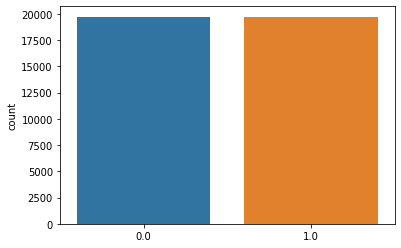

In [179]:
sns.countplot(smy_train)

In [180]:
# Use ADASYN to rebalance the dataset
ad= ADASYN(random_state=0)
adX_train, ady_train= ad.fit_sample(X_train, y_train)

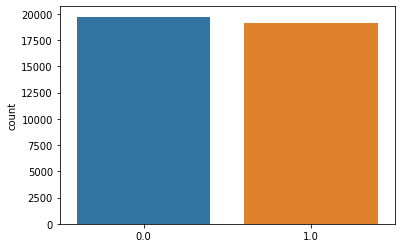

In [181]:
sns.countplot(ady_train)

**Random Forest With SMOTE**

In [182]:
rfc = RandomForestClassifier(n_estimators=300)

In [183]:
rfc.fit(smX_train, smy_train)
rfc_predict = rfc.predict(X_test)

In [184]:
rfc_predict[:10]

array([1., 0., 0., 1., 1., 1., 1., 1., 0., 1.])

In [185]:
print(classification_report(y_test, rfc_predict))

print(confusion_matrix(y_test, rfc_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.53      0.68      4994
         1.0       0.38      0.94      0.54      1519

    accuracy                           0.63      6513
   macro avg       0.67      0.74      0.61      6513
weighted avg       0.83      0.63      0.65      6513

[[2641 2353]
 [  85 1434]]


**SVM with SMOTE**

In [186]:
svc.fit(smX_train, smy_train)
svc_predict = svc.predict(X_test)

In [187]:
print(classification_report(y_test, svc_predict))
print(confusion_matrix(y_test, svc_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86      4994
         1.0       0.56      0.87      0.68      1519

    accuracy                           0.81      6513
   macro avg       0.76      0.83      0.77      6513
weighted avg       0.86      0.81      0.82      6513

[[3953 1041]
 [ 195 1324]]


**Neural Network with SMOTE**

In [188]:
mlp_c = MLPClassifier(hidden_layer_sizes=(14,14,14), max_iter=600)

In [189]:
mlp_c.fit(smX_train, smy_train)
mlp_c_predict = mlp_c.predict(X_test)

In [190]:
print(classification_report(y_test, mlp_c_predict))
print(confusion_matrix(y_test, mlp_c_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86      4994
         1.0       0.54      0.87      0.67      1519

    accuracy                           0.80      6513
   macro avg       0.75      0.83      0.76      6513
weighted avg       0.86      0.80      0.81      6513

[[3885 1109]
 [ 192 1327]]


**K Nearest Neighbors with SMOTE**

In [191]:
sm_knn = KNeighborsClassifier()
sm_knn.fit(smX_train, smy_train)
sm_knn_predict = knn.predict(X_test)
print(classification_report(y_test, sm_knn_predict))
print(confusion_matrix(y_test, sm_knn_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      4994
         1.0       0.67      0.64      0.65      1519

    accuracy                           0.84      6513
   macro avg       0.78      0.77      0.77      6513
weighted avg       0.84      0.84      0.84      6513

[[4506  488]
 [ 548  971]]


**Random Forest With ADASYN**

In [192]:
adrfc = RandomForestClassifier(n_estimators=300)

In [ ]:
adrfc.fit(adX_train, ady_train)
adrfc_predict = adrfc.predict(X_test)

In [ ]:
adrfc_predict[:10]

In [ ]:
print(classification_report(y_test, adrfc_predict))

print(confusion_matrix(y_test, adrfc_predict))

**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectPercentile(f_classif, percentile=25)
selector.fit(X_train, y_train)
for s,n in zip(selector.scores_, columns):
    print ("Score : ", s, " for feature ",n)

We can see the features[a,e,h,m] have a high score,
while the feature [n, c, i, g, b] are very low

In [ ]:
selector_kbest = SelectKBest(f_classif, k=10)
selector_kbest.fit(X_train, y_train)
for s,n in zip(selector_kbest.scores_, columns):
    print ("Score : ", s, " for feature ",n)

In [ ]:
selector_kbest.transform(X_train).shape